# Progetto MCS

Per la gestione della struttura dati e le operazioni elementari fra matrici è richiesto di partire da una libreria open-source, come Eigen, Armadillo, blas/lapack. Oppure, qualora il linguaggio di programmazione lo permetta utilizzare vettori e matrici già implementate al suo interno.


## Data Import

In [88]:
import numpy as np
from scipy.io import mmread
from scipy.sparse import csr_matrix, coo_matrix
import matplotlib.pylab as plt

In [2]:
from jacoby_mcs import Jacoby
ja = Jacoby()
ja.ciao()

hello world


In [76]:
data = {
    "spa1" : 0,
    "spa2" : 0,
    "vem1" : 0,
    "vem2" : 0}
for x in data:
    data[x] = {
        "A" : mmread("data/" + x + ".mtx").tocsr(),
        "x" : 0,
        "b" : 0,
    }
    #data[x]["A"] = csr_matrix(data[x]["A"], (data[x]["A"]).shape).toarray()
    data[x]["x"] = np.array([1] * data[x]["A"].shape[0])
    data[x]["b"] = data[x]["A"].dot(np.array([1] * data[x]["A"].shape[0]))
    data[x]["x"] = np.array([0] * data[x]["A"].shape[0])

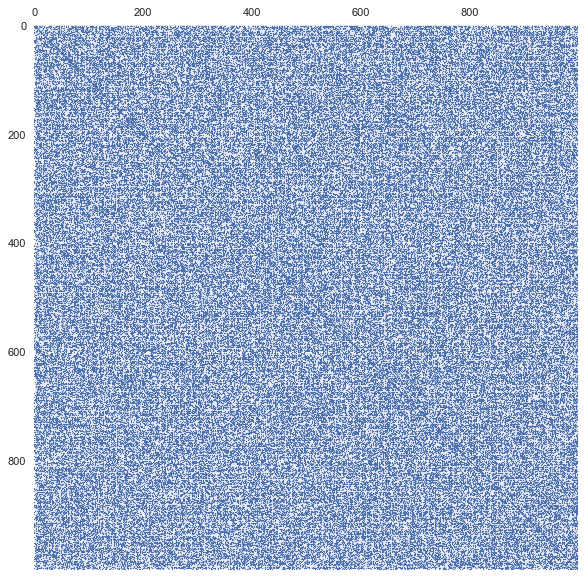

In [98]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['figure.dpi'] = 80
plt.spy(data["spa1"]["A"], markersize = 1)

In [4]:
#import
spa1 = mmread('data/spa1.mtx')
spa2 = mmread('data/spa2.mtx')
vem1 = mmread('data/vem1.mtx')
vem2 = mmread('data/vem2.mtx')

In [5]:
spa1 = csr_matrix(spa1, (spa1).shape).toarray()
spa1

array([[9.61000e+02, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e-02, 0.00000e+00],
       [0.00000e+00, 7.45000e+02, 1.43600e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 1.43600e+00, 5.24000e+02, ..., 0.00000e+00,
        0.00000e+00, 3.20000e-02],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.70548e+02,
        0.00000e+00, 0.00000e+00],
       [5.00000e-02, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.73000e+02, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 3.20000e-02, ..., 0.00000e+00,
        0.00000e+00, 1.49000e+02]])

In [6]:
spa2 = csr_matrix(spa2, (spa2).shape).toarray()
spa2

array([[2.8140e+03, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 7.8800e-01,
        0.0000e+00],
       [0.0000e+00, 1.9740e+03, 0.0000e+00, ..., 0.0000e+00, 9.6800e-01,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 1.4010e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 6.7512e+01, 0.0000e+00,
        0.0000e+00],
       [7.8800e-01, 9.6800e-01, 0.0000e+00, ..., 0.0000e+00, 2.1570e+03,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0230e+03]])

Creazione vettore $b$

In [7]:
spa1x = [1]*spa1.shape[0]
spa1b = spa1.dot(spa1x)
spa1b

array([1191.396,  938.016,  718.654,  552.596, 1189.838,  986.7  ,
        727.774, 1021.248,  633.1  ,  543.72 ,  758.848,  713.41 ,
        983.048,  574.32 , 1021.296, 1150.516, 1010.026,  334.834,
       1020.904,  288.246,  809.684,  229.748,  433.406,  369.084,
        413.068,  603.762, 1063.306, 1149.714,  255.51 ,  399.328,
        897.346,  215.106, 1176.538,  777.678,  896.398,  508.682,
        630.672,  802.308,  682.212, 1050.52 , 1142.068,  609.462,
        567.432,  889.814,  341.922,  724.162,  898.804,  472.34 ,
        207.12 , 1049.242,  577.666,  853.16 , 1087.68 , 1219.592,
        354.532,  637.78 ,  588.214,  208.514,  968.514, 1012.15 ,
        799.708,  663.904,  991.444, 1110.418,  261.62 , 1073.178,
        743.822,  982.466,  689.924,  202.292,  807.99 ,  641.784,
       1010.63 ,  532.502,  724.54 , 1150.992,  436.27 ,  726.23 ,
        432.766,  808.216,  932.454,  814.412,  780.946,  880.958,
        792.35 ,  910.964,  638.632,  550.854,  345.516,  411.

In [8]:
spa2x = [1]*spa2.shape[0]
spa2b = spa2.dot(spa2x)
spa2b

array([3385.904, 2596.528, 1995.15 , ...,  644.866, 2780.136, 1641.716])

Condizione di arresto: $\frac{||Ax^{(k)}-b||}{||b||}<tol$

Reminder: 

1.   **Iniziare le iterazioni con il vettore x nullo**
2.   **tol = [$10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}]$**
3.   **Dichiarare di non essere giunti a convergenza se k > maxiter dove maxiter lo scegliamo (>= 20000)**




## Metodo di Jacobi
https://en.wikipedia.org/wiki/Jacobi_method

In [60]:
niter = 0
new_vector = np.asarray([0]*len(spa1x))
inverted_p_matrix = 1/np.diagonal(spa1)
tol = 10**(-4)
residual = spa1b - spa1.dot(new_vector)
while np.linalg.norm(residual)/np.linalg.norm(spa1b) >= tol and niter <= 20000:
    new_vector = new_vector + (inverted_p_matrix * (-residual))
    residual = spa1b - spa1.dot(new_vector)
    niter = niter +1
    print(np.linalg.norm(residual)/np.linalg.norm(spa1b))

2.383827761218037
5.290680259538006
13.169229285604532
35.036768621512614
96.627836810978
271.3292511882373
768.8178442534532
2188.6006139653778
6245.93292609661
17850.28276609935
51058.02253874986
146122.86086718686
418339.40279643255
1197973.2371383347
3431166.685357932
9407161.696735568
21697667.807619873
46442531.78168015
93846043.92479786
176616675.00177434
310765143.9608359
505939161.29572046
770062795.9684699
1084338354.0548694
1424925854.7962322
1749542602.244499
1998403537.8856215
2128762758.0221343
2146820713.0995424
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0
2147483649.0

In [11]:
niter = 0
xk = np.asarray([0]*len(spa1x))
inverted_p_matrix = 1/np.diagonal(spa1)
tol = 10**(-4)
residual = spa1b - spa1.dot(xk)
xk1 = xk.copy()
cond = True
while cond:
    niter = niter +1
    xk = xk1.copy()
    xk1 = xk + (inverted_p_matrix * (-residual))
    residual = spa1b - spa1.dot(xk1)
    cond = np.linalg.norm(xk1-xk) >= tol and niter <= 20000

In [19]:
xk = np.asarray([0]*len(spa1x))
xk1 = xk.copy()
xk = xk1.copy()
xk1 = xk + (inverted_p_matrix * (-residual))
xk1

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [16]:
#metodo con calcolo singoli elemeti
iteration_vector = [0]*spa1.shape[0]
k = 0
tol = 10**(-4)
while (np.divide(np.linalg.norm((np.subtract(spa1.dot(iteration_vector), spa1b))), np.linalg.norm(spa1b)) >= tol) and k <= 20000:
  #vedere cosa del range e errori che da
  for i in range (0, spa1.shape[0]):
    sigma = 0
    for j in range(0, spa1.shape[0]):
      if(j!=i):
        sigma = sigma + spa1[i][j]*iteration_vector[j]
    iteration_vector[i] = (spa1b[i]-sigma)/spa1[i][i]
  k = k+1
  if(k%300 == 0):
    print(k)

KeyboardInterrupt: 

### Errore relativo - numero iterazioni - tempo di calcolo

In [21]:
#numero iterazioni
k

913

In [61]:
#errore relativo
np.linalg.norm(np.subtract(new_vector, spa1x))/np.linalg.norm(spa1x)

2147483647.0000002

## Metodo di Gauß-Seidel

Preparazione dei parametri necessari al calcolo di Gauss Seidel

In [10]:
## Parameters
mtxA = data["spa1"]["A"]
maxt_iter = 20000
vectB = data["spa1"]["b"]
tol = 10**(-4)

## Creating utils variable
mtxP = mtxA.copy()
mtxN = mtxA.copy()
for i in range(len(mtxA)):
    for j in range(len(mtxA)):
        if (i<=j):
            mtxN[i][j] = 0
        else:
            mtxN[i][j] = -mtxN[i][j]
            mtxP[i][j] = 0

Implementazione del metodo iterativo

Calcolo matriciale

In [26]:
mtxP = mtxA.copy()
mtxN = mtxA.copy()
for i in range(len(mtxA)):
    for j in range(len(mtxA)):
        if (j>i):
            mtxN[i][j] = -mtxN[i][j]
            mtxP[i][j] = 0
        else:
            mtxN[i][j] = 0
            

mtxP

array([[9.61000e+02, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 7.45000e+02, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 1.43600e+00, 5.24000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.70548e+02,
        0.00000e+00, 0.00000e+00],
       [5.00000e-02, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.73000e+02, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 3.20000e-02, ..., 0.00000e+00,
        0.00000e+00, 1.49000e+02]])

In [71]:
mtxA = data["spa1"]["A"].copy().tocoo()
i = 1

mtxP = {
    "col" : [],
    "row" : [],
    "data": []
}
mtxN = {
    "col" : [],
    "row" : [],
    "data": []
}

for i in range(mtxA.nnz):
    if (mtxA.col[i] > mtxA.row[i]):
        mtxN["col"].append(mtxA.col[i])
        mtxN["row"].append(mtxA.row[i])
        mtxN["data"].append(-mtxA.data[i])
    else (mtxA.col[i] < mtxA.row[i]):
        mtxP["col"].append(mtxA.col[i])
        mtxP["row"].append(mtxA.row[i])
        mtxP["data"].append(mtxA.data[i])

mtxP = csr_matrix((mtxP["data"], (mtxP["row"], mtxP["col"])), shape = mtxA.shape)
mtxN = csr_matrix((mtxN["data"], (mtxN["row"], mtxN["col"])), shape = mtxA.shape)
mtxA = mtxA.tocsr()

print(mtxA.nnz)
print(mtxN.nnz+mtxP.nnz)


max_iter = 20000
vectB = data["spa1"]["b"].copy()
tol = 10**(-4)


182434
181434


In [82]:
## Creating Working Variables
k = 0
#vectX = np.random.rand(mtxA.shape[1])
vectX = np.zeros(mtxA.shape[0])
vectX1 = np.zeros(mtxA.shape[0])
residual = vectB - mtxA.dot(vectX)
y = vectX.copy()
#print(vectX)
while np.linalg.norm(residual)/np.linalg.norm(vectB) >= tol and k < max_iter:
    k += 1
    #y = mtxP1.dot(residual)
    vectX = vectX1.copy()
    for i in range(len(vectX)):
        vectX1[i] = (vectB[i] + (mtxA[i,i]*vectX1[i]) - mtxA[i].dot(vectX1)) / mtxA[i,i]
        #y[i] =  (vectB[i] - np.dot(mtxP[i,:i], vectX[:i])) / mtxP[i,i]
        
    #vectX = vectX+y
    residual = mtxA.dot(vectX1) - vectB

    if k%100 == 0:
        print(k, end = "\t")
        if k%1000 == 0:
            print()
            print(np.linalg.norm(residual))
            print(np.linalg.norm(residual)/np.linalg.norm(vectB))
print(k)
print(np.linalg.norm(residual))
print(np.linalg.norm(residual)/np.linalg.norm(vectB))
print(vectX)

100	200	300	400	500	600	700	800	900	913
[-8.84490352e+303 -9.23810647e+303  5.02725211e+303 -6.11178312e+304
 -1.78893352e+304  4.40025642e+303 -6.58004600e+303  1.12170504e+304
  3.87345872e+303 -3.49631384e+303  1.20668818e+304 -3.03452249e+304
 -3.87626471e+302 -2.65884869e+304  1.07365299e+304 -2.24318041e+303
  6.65446347e+303  2.93325722e+304  5.66763733e+303  1.16589116e+304
  4.93227719e+303  7.36175869e+304 -7.50551675e+304 -2.61121736e+305
  1.32400948e+304 -4.66466705e+303 -1.81058249e+304  1.33898397e+302
  1.21476397e+305 -1.37292337e+304  1.49114506e+304  4.67297398e+305
  6.55175666e+303 -5.34113285e+304  3.30564209e+303  7.74090280e+303
  7.23202603e+303  2.15631419e+303 -4.30077813e+304  4.28279697e+303
  6.63446602e+303 -3.17848981e+304 -5.33365670e+304 -1.90305949e+304
  3.21413058e+304 -2.98811646e+303 -1.74076454e+304  1.73207777e+304
  1.05972691e+305  1.50653412e+303  7.34544494e+303 -3.15211270e+303
 -1.18481736e+303 -1.35820247e+304 -6.58036513e+304 -5.07045739

/var/folders/4g/mzbwldx52590w4qhmjpzhmmr0000gn/T/ipykernel_14025/783838813.py:14: RuntimeWarning: overflow encountered in subtract
  vectX1[i] = (vectB[i] + (mtxA[i,i]*vectX1[i]) - mtxA[i].dot(vectX1)) / mtxA[i,i]


In [85]:
#residual = mtxA.dot(data["spa1"]["x"])
vectX = np.zeros(mtxA.shape[0])
vectB = data["spa1"]["b"].copy()
residual = mtxA.dot(vectX) - vectB
#residual = vectB
#residual = data["spa1"]["b"]
print(np.linalg.norm(residual))
print(np.linalg.norm(residual)/np.linalg.norm(vectB))


23545.406627064054
1.0


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Calcolo su ogni elemento

In [ ]:
k = 0
vectX = np.random.rand(mtxA.shape[1])
#vectX = [0]*mtxA.shape[0]
vectX1 = vectX.copy()
residual = np.subtract(vectB, mtxA.dot(vectX))
cond = True

while cond:
    k += 1
    vectX = vectX1.copy()
    for i in range(len(vectX1)):
        xi = vectB[i]
        for j in range(len(vectX)):
            xi -= mtxA[i][j] * vectX1[j]
        vectX1[i] = xi/mtxA[i][i]
    cond = np.linalg.norm(vectX1-vectX)/np.linalg.norm(vectX) >= tol and k <= 20000
    
    if k%100 == 0:
        print(k, end = "\t")
        if k%1000 == 0:
            print()
            print(np.linalg.norm(vectX1-vectX)/np.linalg.norm(vectX))
    

if(np.linalg.norm(residual) > tol):
    print("CIAO")
else:
    print(tol)
    print(np.linalg.norm(residual))


In [ ]:
k = 0
vectX = [1] * data[x]["A"].shape[0]
residual = np.subtract(vectB, mtxA.dot(vectX))

while (np.linalg.norm(residual) > tol) and k < maxt_iter:
    k += 1
    for i in range(len(vectX)):
        xi = vectB[i]
        for j in range(len(vectX)):
            xi -= mtxA[i][j] * vectX[j]
        vectX[i] = xi/mtxA[i][i]
    residual = np.subtract(vectB, mtxA.dot(vectX))
    if k%100 == 0:
        print(k, end = "\t")
    if k%1000 == 0:
        print()
        print(np.linalg.norm(residual))

if(np.linalg.norm(residual) > tol):
    print("CIAO")
else:
    print(tol)
    print(np.linalg.norm(residual))

## Metodo del Gradiente


## Metodo del Gradiente coniugato

- Un vettore ottimale rispetto a una direzione d se d*r(k)=0
- x(k+1) è ottimale rispetto a r(k+1)
- x(k+1) = x(k) + a(k)d(k)
- a(k) = ( d(k)^t * r(k) ) / ( d(k)^t * Ad(k) )
- d(k+1) = r(k+1) - b(k)*d(k)
- b(k) = ( d(k)^t * Ar(k+1) ) / ( d(k)^t * Ad(k) )



In [17]:
#gradiente coniugato
#capire se in ak e bk bisogna calcolare la derivata di dir
niter = 0
new_vector = np.asarray([0]*len(spa1x))
tol = 10**(-4)
dir = spa1b - spa1.dot(new_vector)
residual = spa1b - spa1.dot(new_vector)
while np.linalg.norm(residual)/np.linalg.norm(spa1b) >= tol and niter <= 20000:
    r = spa1b - spa1.dot(new_vector)
    y = spa1.dot(dir)
    z = spa1.dot(r)
    ak = (dir * r) / (dir * y)
    new_vector = new_vector + ak * dir
    r = spa1b - spa1.dot(new_vector)
    w = spa1.dot(r)
    bk = (dir * w) / (dir * y)
    dir = r - (bk*dir)

    residual = spa1b - spa1.dot(new_vector)
    niter = niter + 1

AttributeError: 'numpy.ndarray' object has no attribute 'deriv'

In [16]:
np.linalg.norm(np.subtract(new_vector, spa1x))/np.linalg.norm(spa1b)

8.392343206660939e+66

In [ ]:
#jacobi
niter = 0
new_vector = np.asarray([0]*len(spa1x))
tol = 10**(-4)
while np.linalg.norm(residual)/np.linalg.norm(spa1b) >= tol and niter <= 20000:
    new_vector = new_vector + (inverted_p_matrix * (-residual))
    residual = spa1b - spa1.dot(new_vector)
    niter = niter +1
    print(np.linalg.norm(residual)/np.linalg.norm(spa1b))